<a href="https://colab.research.google.com/github/BelovedTemitope/Machine-Learning-Projects/blob/master/DSN_Zindi_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/DSN Hack data/Train.csv')
data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [ ]:
data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

## Dependent Variable

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


no     42285
yes    13715
Name: default_status, dtype: int64

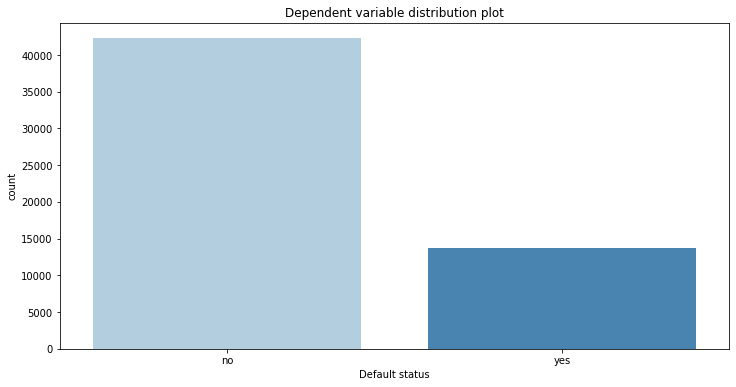

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['default_status'],palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('Default status')

data['default_status'].value_counts()

In [ ]:
data.drop('Applicant_ID', axis=1,inplace=True)
data['default_status'].replace(['yes','no'],[1,0],inplace=True)
data.shape

(56000, 51)

## Handling Missing Values and Preprocessing

In [ ]:
# Dummying the categorical column ,drop_first param
ddf=pd.get_dummies(data['form_field47'],prefix='form_field47')
data=pd.concat([data,ddf],axis=1)
data.drop('form_field47',axis=1,inplace=True)
data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,NaN,1.129518,0.044335,0,1,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,349.805730,1.620483,0.322436,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,NaN,1.513370,0.011640,1,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,89.940100,0.664452,0.082729,0,1,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630,0,1,0


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 60kB/s 


In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PowerTransformer#log transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
X = data.drop('default_status',axis=1)
y = data['default_status']

In [ ]:
simp = SimpleImputer(strategy='constant')
dat = simp.fit_transform(X)
X=pd.DataFrame(dat,columns=X.columns)

In [ ]:
pipeline = Pipeline(steps=[('power',PowerTransformer()),('scaler',MinMaxScaler())])
Xol = pipeline.fit_transform(X)
X=pd.DataFrame(Xol,columns=X.columns)

In [ ]:
X.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
0,0.768020,0.382322,0.786299,0.0,0.000000,0.000000,0.348481,0.420414,0.433945,0.371233,0.888235,0.517142,0.445795,0.133879,0.745116,0.998569,0.99617,0.995129,0.867232,0.827403,0.407485,0.000000,0.000000,0.392361,0.450090,0.613020,0.659543,0.335530,0.450415,0.837668,0.000000,0.406080,0.405384,0.999695,0.000000,0.346451,0.521222,0.204482,0.000000,0.000000,0.0,0.508179,0.178220,0.836910,0.0,0.0,0.000000,0.633542,0.046418,1.0,0.0
1,0.777364,0.628885,0.282344,0.0,0.000000,0.000000,0.209951,0.466774,0.503104,0.277807,0.779510,0.567539,0.367248,0.099074,0.685900,0.998569,0.99617,0.995129,0.796079,0.748443,0.377071,0.799201,0.923515,0.352311,0.457922,0.564921,0.610646,0.478471,0.395020,0.834285,0.000000,0.534717,0.548545,0.000000,0.000000,0.394914,0.664633,0.299974,0.000000,0.000000,0.0,0.439183,0.392255,0.143831,0.0,0.0,0.546420,0.723156,0.263767,1.0,0.0
2,0.695379,0.563223,0.894999,0.0,0.999756,0.000000,0.212694,0.000000,0.232366,0.234965,0.000000,0.000000,0.000000,0.087008,0.642564,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300083,0.395519,0.435814,0.335530,0.430363,0.000000,0.982634,0.159003,0.090220,0.000000,0.000000,0.346451,0.000000,0.257574,0.000000,0.990738,0.0,0.268481,0.562206,0.982968,0.0,0.0,0.000000,0.707016,0.012599,1.0,0.0
3,0.738513,0.260339,0.475212,0.0,0.000000,0.563119,0.269980,0.448930,0.428048,0.297847,0.000000,0.428458,0.335723,0.113020,0.758222,0.000000,0.00000,0.000000,0.631040,0.578117,0.390663,0.773220,0.000000,0.351393,0.308578,0.373166,0.412383,0.335530,0.366293,0.000000,0.000000,0.324004,0.401742,0.993946,0.999947,0.194776,0.442522,0.204482,0.999999,0.000000,0.0,0.579149,0.178220,0.790922,0.0,0.0,0.448919,0.490422,0.083403,1.0,0.0
4,0.737601,0.667764,0.690230,0.0,0.000000,0.290179,0.155361,0.410026,0.341748,0.188900,0.799145,0.432860,0.294676,0.099074,0.619525,0.000000,0.00000,0.000000,0.867232,0.827403,0.370908,0.770843,0.907287,0.378132,0.296163,0.347970,0.385853,0.335530,0.483529,0.923399,0.961587,0.260364,0.123006,0.000000,0.000000,0.469648,0.215461,0.499712,0.000000,0.990763,0.0,0.400211,0.473212,0.421539,0.0,0.0,0.455386,0.692955,0.047712,1.0,0.0


In [ ]:
kf = StratifiedKFold(n_splits=5)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    cat = CatBoostClassifier()
    cat.fit(xtr,ytr)
    score = roc_auc_score(yvl,cat.predict_proba(xvl)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = cat.predict_proba(x_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
Learning rate set to 0.052243
0:	learn: 0.6596157	total: 90.6ms	remaining: 1m 30s
1:	learn: 0.6309442	total: 126ms	remaining: 1m 2s
2:	learn: 0.6060322	total: 161ms	remaining: 53.5s
3:	learn: 0.5846721	total: 196ms	remaining: 48.7s
4:	learn: 0.5663891	total: 231ms	remaining: 46s
5:	learn: 0.5499725	total: 270ms	remaining: 44.7s
6:	learn: 0.5370487	total: 308ms	remaining: 43.6s
7:	learn: 0.5242449	total: 340ms	remaining: 42.1s
8:	learn: 0.5145566	total: 376ms	remaining: 41.4s
9:	learn: 0.5053085	total: 412ms	remaining: 40.8s
10:	learn: 0.4966417	total: 448ms	remaining: 40.3s
11:	learn: 0.4899778	total: 484ms	remaining: 39.8s
12:	learn: 0.4829713	total: 524ms	remaining: 39.7s
13:	learn: 0.4760183	total: 567ms	remaining: 39.9s
14:	learn: 0.4701288	total: 604ms	remaining: 39.7s
15:	learn: 0.4661130	total: 638ms	remaining: 39.2s
16:	learn: 0.4615814	total: 674ms	remaining: 39s
17:	learn: 0.4573871	total: 707ms	remaining: 38.6s
18:	learn: 0.4537766	total: 747ms	remaining: 38.5s


NameError: ignored

In [ ]:
cat = CatBoostClassifier()
lgb = LGBMClassifier
xgb = XGBClassifier
rfc = RandomForestClassifier
param = {
    'scale_pos_weight': [2,3,4,6,7]
}

In [ ]:
# grid = GridSearchCV(estimator=cat,param_grid=param,cv=skf,scoring='roc_auc')

In [ ]:
# grid.fit(X,y)

In [ ]:
clf = VotingClassifier(estimators=[('cat',cat),('lgb',lgb),('xgb',xgb),('rfc',rfc)],voting='soft',n_jobs=-1)
# cross=cross_val_score(estimator=clf,X=X,y=y,scoring='roc_auc',cv=skf)
clf.fit(X,y)